EDA - 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Car Sale.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [3]:
df.head(3)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville


Q1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [4]:
average_prices = df.groupby("Dealer_Name")["Price ($)"].mean()
average_prices.sample(5)

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
Nebo Chevrolet,27818.889415
Race Car Help,28163.372706
Capitol KIA,28189.703822
Progressive Shippers Cooperative Association No,27884.264036


In [5]:
# Adding Average price column in my data
df["Average Price"] = df.groupby("Dealer_Name")["Price ($)"].transform("mean")
df.sample(3)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region,Average Price
10562,C_CND_010563,12/29/2022,Haylee,Male,357000,Gartner Buick Hyundai Saab,Oldsmobile,Silhouette,DoubleÂ Overhead Camshaft,Auto,Red,12000,38701-8047,Sedan,8251714,Greenville,28247.621019
217,C_CND_000218,1/21/2022,Jazmine,Female,480000,Pitre Buick-Pontiac-Gmc of Scottsdale,Acura,RL,Overhead Camshaft,Manual,Pale White,17001,99301-3882,SUV,8884589,Pasco,27404.248408
17294,C_CND_017295,8/30/2023,Chad,Male,1040000,Star Enterprises Inc,Pontiac,Grand Prix,DoubleÂ Overhead Camshaft,Auto,Pale White,19000,99301-3882,Passenger,7456551,Pasco,28113.055244


In [6]:
df.columns = df.columns.str.strip()
# i did this because when i tried to access dealer number it gave me error so i thought there
# there might be some added space between the columns word name
#  KeyError: 'Dealer_No'
Avg_price_of_dealers = df.loc[:,["Dealer_Name","Average Price","Dealer_No"]].drop_duplicates()
Avg_price_of_dealers

,Dealer_Name,Average Price,Dealer_No
0,Buddy Storbeck's Diesel Service Inc,27217.261563,06457-3834
1,C & M Motors Inc,28111.755200,60504-7114
2,Capitol KIA,28189.703822,38701-8047
3,Chrysler of Tri-Cities,28123.091054,99301-3882
4,Chrysler Plymouth,27555.526400,53546-9427
5,Classic Chevy,28602.014446,85257-3102
6,Clay Johnson Auto Sales,27816.027113,78758-7841
7,U-Haul CO,28769.919006,78758-7841
8,Rabun Used Car Sales,28527.536177,85257-3102
10,Race Car Help,28163.372706,78758-7841


Q2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [7]:
# Calculate the standard deviation of prices for each company
price_variation = df.groupby("Company")["Price ($)"].std().reset_index()
price_variation.rename(columns={"Price ($)": "Price_StdDev"}, inplace=True)

# Find the company with the highest variation
highest_variation = price_variation.loc[price_variation["Price_StdDev"].idxmax()]

# Display the result
print(highest_variation)

Company              Lincoln
Price_StdDev    19658.050211
Name: 15, dtype: object


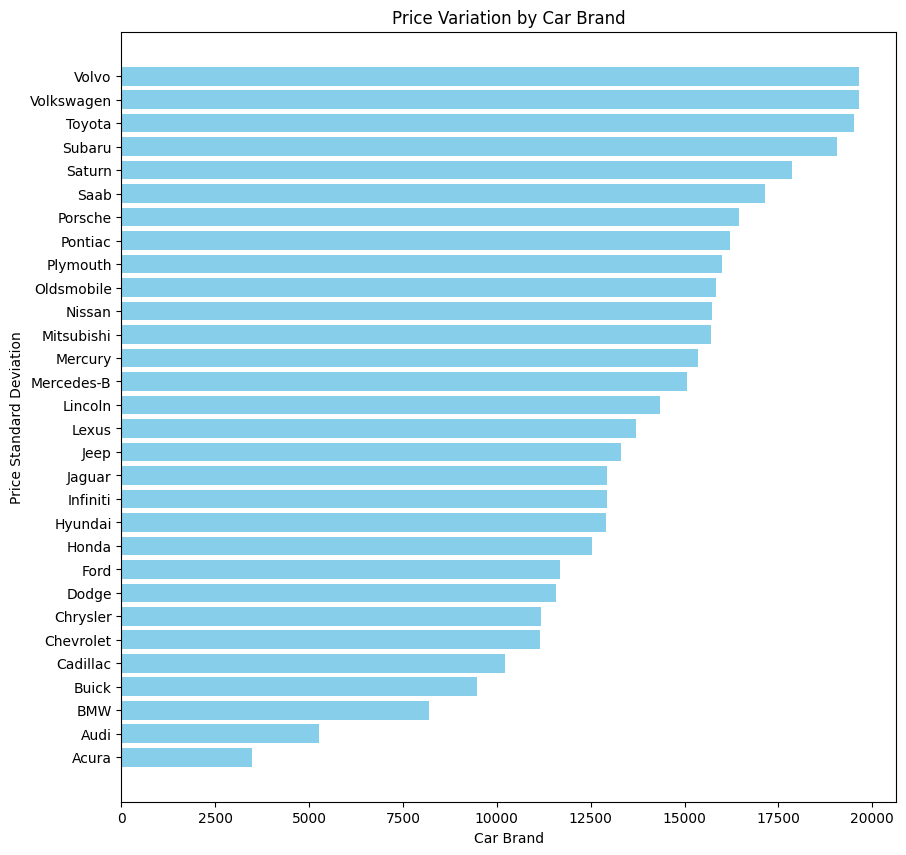

In [8]:
# Plotting the bar chart
sorted_price_variation = price_variation.sort_values(by="Price_StdDev", ascending=1)
plt.figure(figsize=(10, 10))
plt.barh(price_variation["Company"], sorted_price_variation["Price_StdDev"], color='skyblue')
plt.xlabel('Car Brand')
plt.ylabel('Price Standard Deviation')
plt.title('Price Variation by Car Brand')
plt.show()

Q3 What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

In [9]:
df['Transmission'].value_counts()

,count
Transmission,
Auto,12571
Manual,11335


<Figure size 1000x600 with 0 Axes>

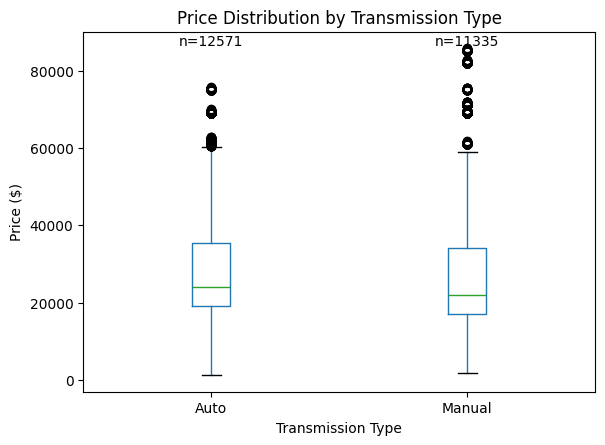

In [10]:
transmission_counts = df['Transmission'].value_counts()

# Plotting the box plot
plt.figure(figsize=(10, 6))
boxplot = df.boxplot(column="Price ($)", by="Transmission", grid=False)
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Transmission Type')
plt.suptitle('')  # Suppress the default title

# Add count annotations
for transmission_type in transmission_counts.index:
    count = transmission_counts[transmission_type]
    plt.text(x=transmission_counts.index.get_loc(transmission_type) + 1, y=df['Price ($)'].max(), s=f'n={count}', ha='center', va='bottom')

# Display the plot
plt.show()

Q4 What is the distribution of car prices across different regions?

In [11]:
data = df.groupby("Dealer_Region")["Price ($)"].median().reset_index()
data

,Dealer_Region,Price ($)
0,Aurora,23000.0
1,Austin,23801.0
2,Greenville,22500.0
3,Janesville,23000.0
4,Middletown,22750.0
5,Pasco,23000.0
6,Scottsdale,22600.0


<Figure size 1000x600 with 0 Axes>

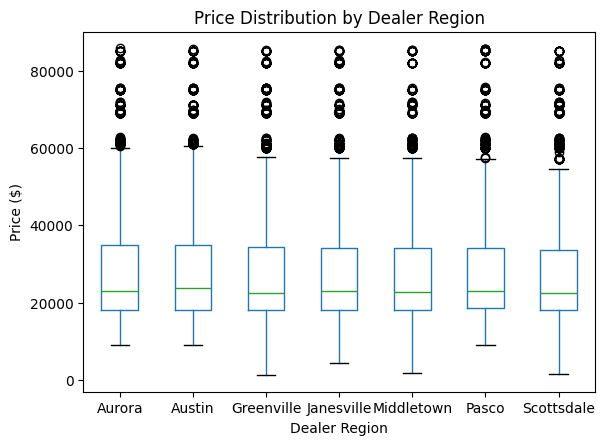

In [12]:
# Plotting the box plot
plt.figure(figsize=(10, 6))
df.boxplot(column="Price ($)", by="Dealer_Region", grid=False)
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Dealer Region')
plt.suptitle('')  # Suppress the default title
plt.show()

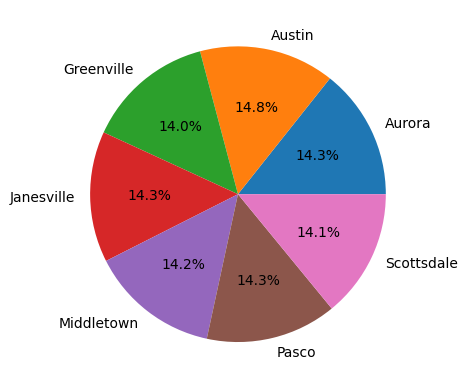

In [13]:
plt.pie(x = data["Price ($)"],labels = data.Dealer_Region, autopct = "%1.1f%%")
plt.show()

Q5 What is the distribution of cars based on body styles?

In [15]:
data = df.groupby("Body Style")["Company"].count()

Q6  How does the average selling price of cars vary by customer gender and annual income?

<Axes: xlabel='Price ($)', ylabel='Annual Income'>

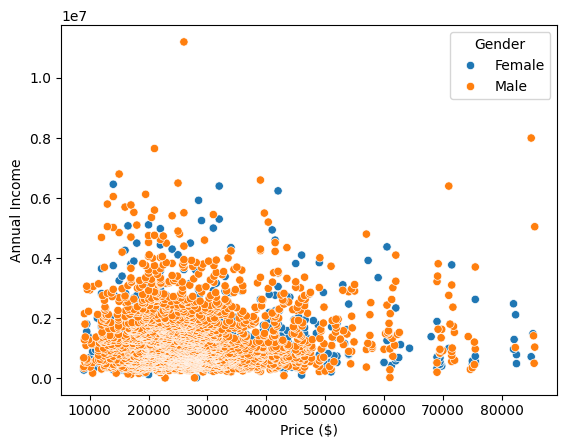

In [16]:
data = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()



sns.scatterplot(x = data["Price ($)"], y = data["Annual Income"],hue = data["Gender"] )

Q7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?

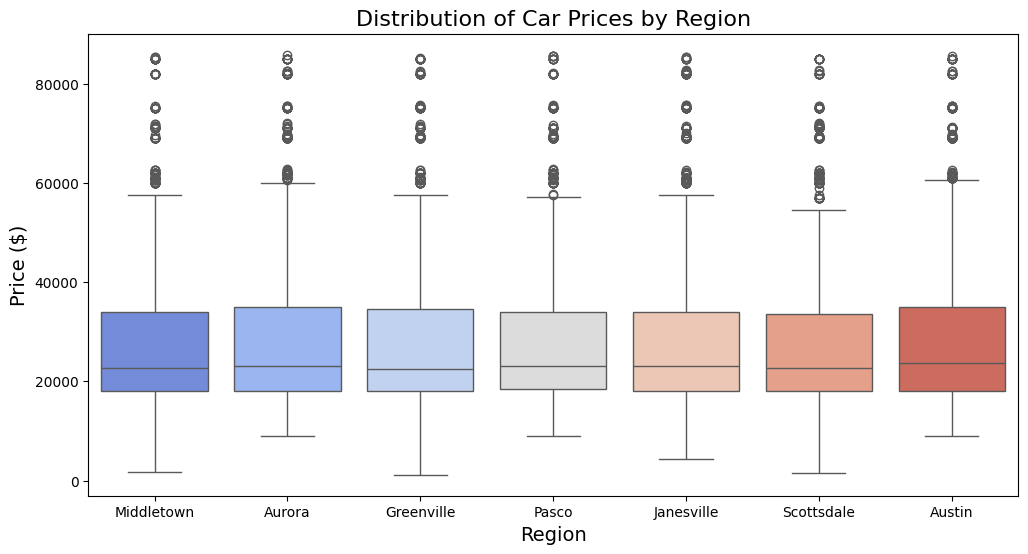

<ipython-input-17-566666d94a00>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dealer_Region', data=df, palette='viridis')


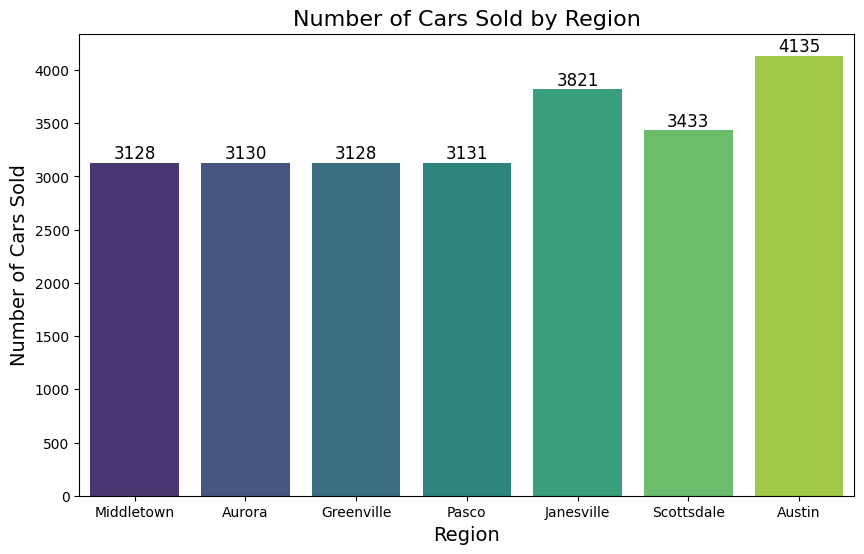

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', hue='Dealer_Region', data=df, palette='coolwarm', dodge=False)
plt.title('Distribution of Car Prices by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend([],[], frameon=False)  # Hide the legend
plt.show()

# 2. Number of Cars Sold by Region
plt.figure(figsize=(10, 6))
sns.countplot(x='Dealer_Region', data=df, palette='viridis')
plt.title('Number of Cars Sold by Region', fontsize=16)

# Add count values on top of bars
ax = plt.gca()
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{int(bar.get_height())}',
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.xlabel('Region', fontsize=14)
plt.ylabel('Number of Cars Sold', fontsize=14)
plt.show()

Q8 How does the average car price differ between cars with different engine sizes?

In [18]:
df.groupby("Engine")["Price ($)"].mean()


,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


Q9 How do car prices vary based on the customer’s annual income bracket?

<Axes: xlabel='Annual Income', ylabel='Price ($)'>

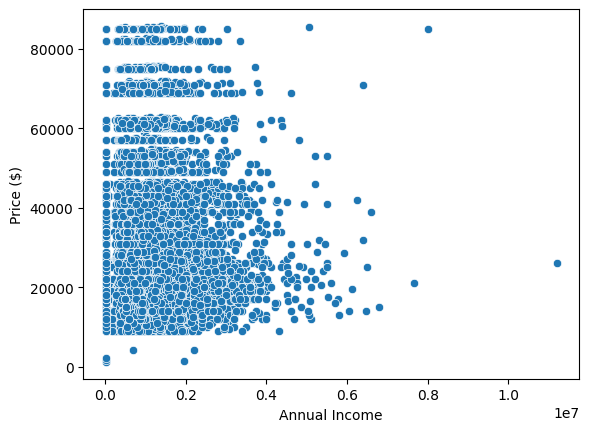

In [19]:
sns.scatterplot(x = "Annual Income",y = "Price ($)",data = df)

Q10 What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [20]:
datas = df.groupby("Model")["Price ($)"].agg(["count","sum"])
datas.rename(columns = {"count":"total_sales","sum":"total_price"},inplace = True)
datas.sort_values(by = "total_sales",ascending = False)[:5]

,total_sales,total_price
Model,,
Diamante,418,9308151
Silhouette,411,12271849
Prizm,411,9386606
Passat,391,7663885
Ram Pickup,383,10655391


Q11 How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

In [21]:
data=df.groupby(["Engine","Color"])["Price ($)"].sum().reset_index()
data

,Engine,Color,Price ($)
0,DoubleÂ Overhead Camshaft,Black,107497634
1,DoubleÂ Overhead Camshaft,Pale White,179083474
2,DoubleÂ Overhead Camshaft,Red,68531112
3,Overhead Camshaft,Black,116935984
4,Overhead Camshaft,Pale White,130275196
5,Overhead Camshaft,Red,69202065


Q12  Is there any seasonal trend in car sales based on the date of sale?

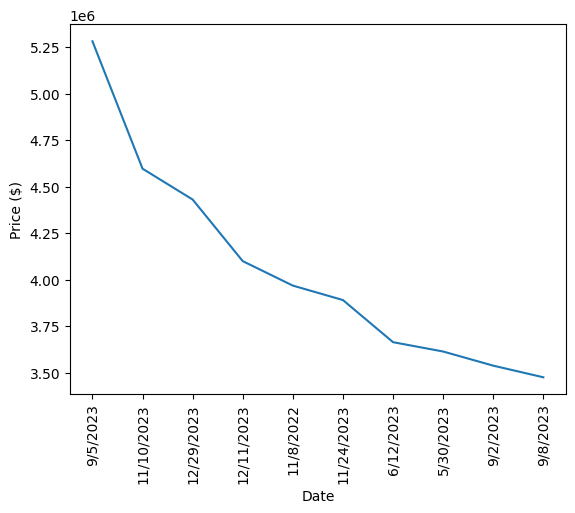

In [22]:
data = df.groupby("Date")["Price ($)"].sum().sort_values(ascending = False)[:10].reset_index()
sns.lineplot(x = data.Date,y = data["Price ($)"])
plt.xticks(rotation = 90)
plt.show()

Q13 How does the car price distribution change when considering different combinations of body style and
transmission type?

In [23]:
df.groupby(["Transmission","Body Style"])["Price ($)"].sum().reset_index()

,Transmission,Body Style,Price ($)
0,Auto,Hardtop,44380425
1,Auto,Hatchback,89598664
2,Auto,Passenger,58409987
3,Auto,SUV,84869334
4,Auto,Sedan,77853810
5,Manual,Hardtop,42227483
6,Manual,Hatchback,76635810
7,Manual,Passenger,55766328
8,Manual,SUV,85747815
9,Manual,Sedan,56035809


<Axes: xlabel='Body Style', ylabel='Price ($)'>

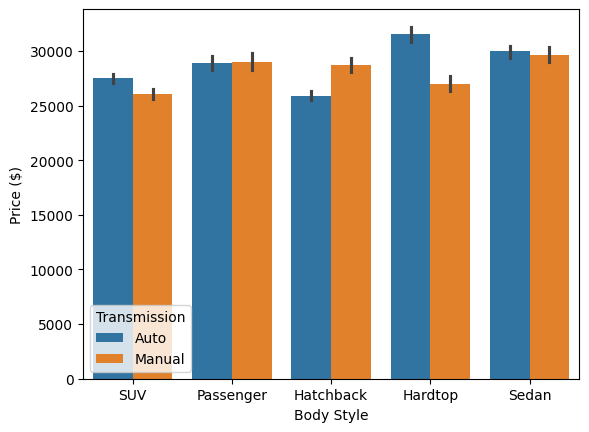

In [24]:
sns.barplot(x= df["Body Style"],y = df["Price ($)"],hue = df["Transmission"])

Q14  What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

<ipython-input-25-f62647b7faf4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Engine": {"DoubleÂ\xa0Overhead Camshaft": 1, "Overhead Camshaft": 0}})


[1 0]


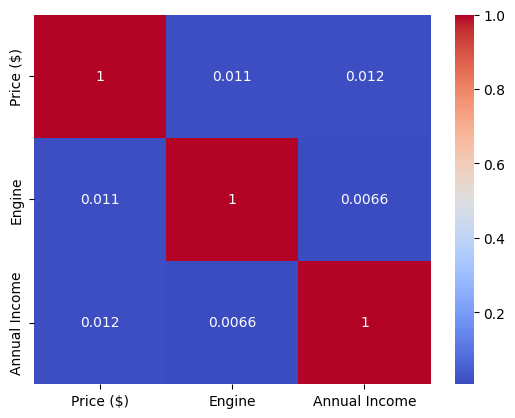

In [25]:
df = df.replace({"Engine": {"DoubleÂ\xa0Overhead Camshaft": 1, "Overhead Camshaft": 0}})
df = df.infer_objects(copy=False)


print(df["Engine"].unique())

# Plot the heatmap
sns.heatmap(df[["Price ($)", "Engine", "Annual Income"]].corr(), cmap="coolwarm", annot=True)
plt.show()

Q15 How does the average car price vary across different car models and engine types?

In [26]:
data = df.groupby(["Engine","Model"])["Price ($)"].mean().reset_index()
data

,Engine,Model,Price ($)
0,0,3000GT,21770.659864
1,0,323i,21038.162162
2,0,328i,38676.177215
3,0,4Runner,25075.416667
4,0,5-Sep,28071.454545
...,...,...,...
256,1,Viper,32118.479167
257,1,Voyager,22066.026316
258,1,Windstar,25145.636364
259,1,Wrangler,21145.294737


<ipython-input-27-5609d12d9984>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data["Engine"],y = data["Price ($)"],palette = "coolwarm")


<Axes: xlabel='Engine', ylabel='Price ($)'>

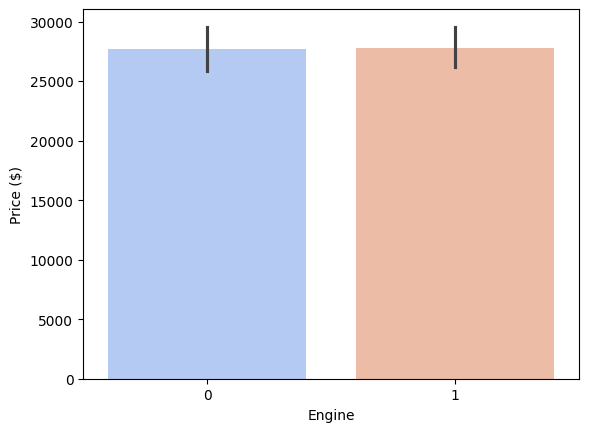

In [27]:
sns.barplot(x = data["Engine"],y = data["Price ($)"],palette = "coolwarm")